In [1]:
# Import necessary libraries

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
# Importing the dataset

In [4]:
book = pd.read_csv(r"D:\Data science\Assignments docs\Association rules\book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
book.shape

(2000, 11)

In [6]:
book.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [7]:
book.isna().sum()                   # Checking for any NA values

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [8]:
# No NA values in the dataset

In [9]:
# Value counts for each book  

In [10]:
counts = book.apply(pd.Series.value_counts)
counts

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,1154,1505,1138,1436,1571,1518,1448,1773,1926,1903,1783
1,846,495,862,564,429,482,552,227,74,97,217


In [11]:
import matplotlib.pyplot as plt

In [12]:
# Bar plot of counts for each book

Text(0.5, 0, 'Items')

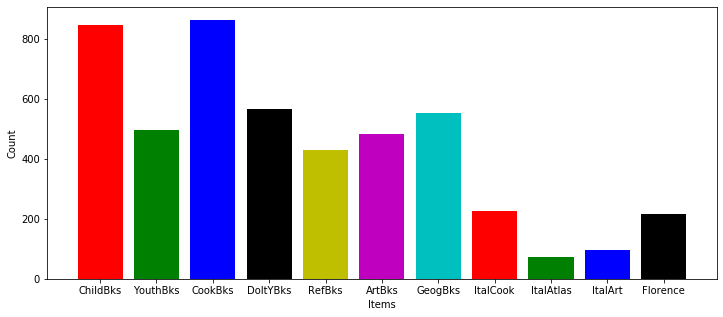

In [13]:
ax = plt.subplots(figsize=(12,5))
plt.bar(
    x=book.columns,
    height=counts.iloc[1,],
    width = 0.8,
    color='rgbkymc');
plt.ylabel("Count");plt.xlabel("Items")

In [14]:
# Frequency of items for CookBks is the highest with 862 counts and lowest for ItalAtlas with 74 counts

# Apriori algorithm

In [15]:
# Using the apriori alogorithm and filtering the books with minimun support of 1%

In [16]:
frequent_itemsets = apriori(book, min_support=0.01, max_len=3, use_colnames = True)
frequent_itemsets.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [17]:
frequent_itemsets.shape                         

(208, 2)

In [18]:
# Sorting the frequent items in descending order

In [19]:
frequent_itemsets.sort_values('support', ascending=False, inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of      support                        itemsets
2     0.4310                       (CookBks)
0     0.4230                      (ChildBks)
3     0.2820                      (DoItYBks)
6     0.2760                       (GeogBks)
12    0.2560             (ChildBks, CookBks)
..       ...                             ...
170   0.0110     (RefBks, ItalArt, DoItYBks)
165   0.0105    (Florence, CookBks, ItalArt)
108   0.0105   (Florence, ChildBks, ItalArt)
134   0.0100  (YouthBks, ItalAtlas, GeogBks)
174   0.0100   (DoItYBks, ArtBks, ItalAtlas)

[208 rows x 2 columns]>

In [20]:
# Since there are many itemsets with 1% support, let's change the minimum support to 10%

In [21]:
frequent_itemsets2 = apriori(book, min_support=0.1, max_len=3, use_colnames = True)
frequent_itemsets2.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [22]:
frequent_itemsets2.shape

(39, 2)

In [23]:
# Sorting the frequent items in descending order

In [24]:
frequent_itemsets2.sort_values('support', ascending=False, inplace=True)
frequent_itemsets2.sort_values

<bound method DataFrame.sort_values of     support                       itemsets
2    0.4310                      (CookBks)
0    0.4230                     (ChildBks)
3    0.2820                     (DoItYBks)
6    0.2760                      (GeogBks)
10   0.2560            (ChildBks, CookBks)
1    0.2475                     (YouthBks)
5    0.2410                       (ArtBks)
4    0.2145                       (RefBks)
14   0.1950            (ChildBks, GeogBks)
22   0.1925             (CookBks, GeogBks)
19   0.1875            (CookBks, DoItYBks)
11   0.1840           (ChildBks, DoItYBks)
21   0.1670              (ArtBks, CookBks)
9    0.1650           (ChildBks, YouthBks)
13   0.1625             (ArtBks, ChildBks)
15   0.1620            (CookBks, YouthBks)
20   0.1525              (RefBks, CookBks)
12   0.1515             (RefBks, ChildBks)
33   0.1495   (ChildBks, CookBks, GeogBks)
30   0.1460  (ChildBks, CookBks, DoItYBks)
26   0.1325            (DoItYBks, GeogBks)
29   0.1290  (C

In [25]:
# we have got total 39 frequent itemsets with 10% support

# Association rule

In [26]:
# Applying association rule with minimum threshold value of lift as 1

In [27]:
rules = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
4,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
5,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
6,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
9,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347


In [28]:
rules.shape

(100, 9)

In [29]:
# Filtering the rules again with minimum confidence of 50% and minimun lift of 2

In [30]:
rules = rules[ (rules['lift'] >= 2) &
       (rules['confidence'] >= 0.5) ]

In [31]:
# Sorting the rules by lift in descending order

In [32]:
rules = rules.sort_values('lift', ascending= False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
86,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
94,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
80,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
82,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
55,(RefBks),"(ChildBks, CookBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
88,"(ChildBks, GeogBks)",(ArtBks),0.1950,0.2410,0.1020,0.523077,2.170444,0.055005,1.591452
92,"(ArtBks, CookBks)",(DoItYBks),0.1670,0.2820,0.1015,0.607784,2.155264,0.054406,1.830626
27,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
22,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319


In [33]:
rules.shape

(17, 9)

In [34]:
# Finally have got total of 17 rules with minimum support of 10% , minimum confidence of 50% and minimum lift of 1

In [35]:
# Showing top 5 rules

In [36]:
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
86,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628
94,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.241,0.1015,0.541333,2.246196,0.056313,1.654797
80,"(ArtBks, CookBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063
82,"(CookBks, GeogBks)",(ArtBks),0.1925,0.241,0.1035,0.537662,2.230964,0.057107,1.641657


In [37]:
# Observations
# Rule 1 shows that people who have bought "ItalCook" book will also buy "CookBks" book with 100% confidence and lift of 2.32
# Since both the books belong to cooking category. buyer will be obviously interested in the second book of same category 

# Visualizations 

In [38]:
# importing necessary libraries

In [39]:
import random
import matplotlib.pyplot as plt

In [40]:
# Defining the support and confidence from finalized rules to plot them

In [41]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [42]:
# plot of support v/s confidence

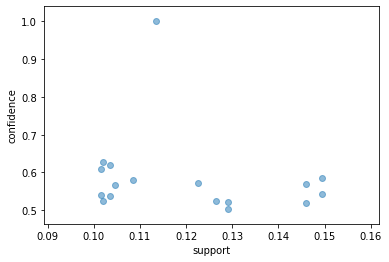

In [43]:
plt.scatter(support, confidence,   alpha=0.5, marker="o")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [44]:
# All the rules have confidence in the range of 0.5 to 0.7 except for one rule which has the highest confidence of 100% and support of 11%

In [45]:
# plot of support v/s lift

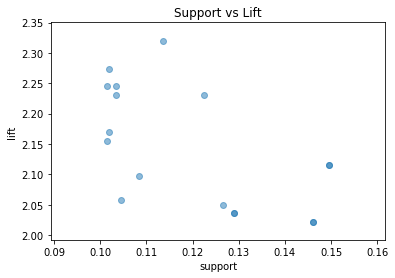

In [46]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [47]:
# Rules with higher support has low lift values and rules with lower support has higher lift

In [48]:
# plot of confidence v/s lift

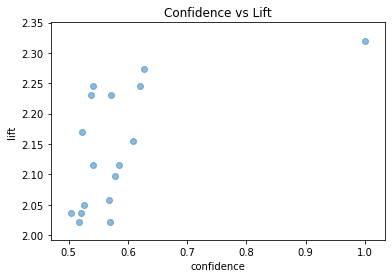

In [49]:
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

In [50]:
# All the rules have confidence in the range of 0.5 to 0.7 except for one rule which has the highest confidence of 100% and highest lift of 2.32